In [40]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [41]:
df_GE = df[df['job_country'] == 'Germany'].copy()
df_GE.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
638664,Senior Data Scientist,(Senior) Consultant Data Scientist,"Hamburg, Germany",via BeBee,Full-time,False,Germany,2023-10-10 12:15:36,False,False,Germany,None,NaN,NaN,Simon Kucher,"['python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ..."
168258,Data Analyst,Data Analyst - Customer Data (m/f/d),Germany,via Jobijoba.de,Full-time,False,Germany,2023-08-01 15:29:35,True,False,Germany,None,NaN,NaN,Project A Ventures,"['power bi', 'excel']","{'analyst_tools': ['power bi', 'excel']}"


In [42]:
df_GE['job_posted_month'] = df_GE['job_posted_date'].dt.strftime('%B')

In [43]:
df_GE_pivot = df_GE.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size'
)
df_GE_pivot.reset_index(inplace=True)

In [44]:
df_GE_pivot['month_no'] = pd.to_datetime(df_GE_pivot['job_posted_month'], format='%B').dt.month

In [45]:
df_GE_pivot.sort_values('month_no', inplace=True)
df_GE_pivot.set_index('job_posted_month', inplace=True)
df_GE_pivot.drop(columns='month_no')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,11,596,622,759,39,128,239,205,52
February,49,11,593,571,611,35,131,199,171,60
March,43,3,582,511,529,18,86,199,157,42
April,47,13,454,432,520,17,93,190,146,20
May,45,7,430,364,351,16,81,123,111,29
June,31,7,558,434,430,22,92,137,138,30
July,46,7,545,474,438,25,105,143,125,50
August,28,9,489,399,407,30,86,145,141,48
September,106,24,656,668,583,41,126,178,137,66


In [54]:
top_3 = df_GE['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

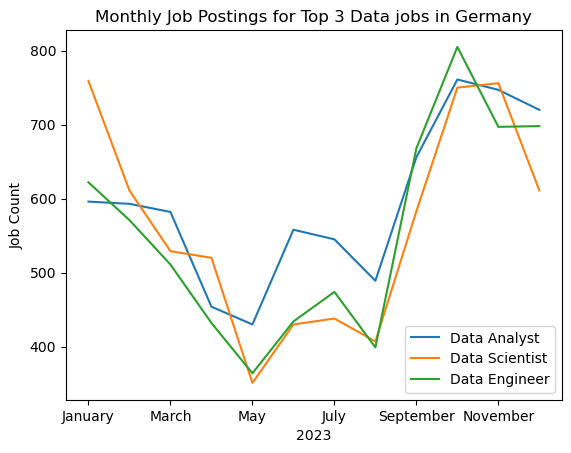

In [65]:
df_GE_pivot[top_3].plot(kind="line")
plt.title('Monthly Job Postings for Top 3 Data jobs in Germany')
plt.xlabel(2023)
plt.ylabel('Job Count')
plt.legend()
plt.show()